<a href="https://colab.research.google.com/github/karabash/.NEtFinalExam/blob/master/Lab2_del_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Laboration 2 part 1: 

In this first part of laboration 2 you will practice some aspects of data wrangling and descriptive statistics on a structured dataset. 

Make sure to read all instructions carefully and also to answer all questions. Questions are marked with **Q** in the laboration. Always answer these questions directly after it is posed, using markdown language. 

There are also a number of coding exercises without specific questions attached. These also have to be coded in order to pass the laboration. 

The dataset used in this laboration is called *modcloth_final_data.json* and is located in the data folder in the repository for laboration 2. 

To hand in the laborations only provide the link to the finished Colaboratory notebook in Studium, or hand in a HTML-file with all the cells executed to show the output. 

Good luck!



 Copyright 2018 Aditya Agrawal

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

The content in this notebook has been subjected to changes in order to make it fit with the course Data Analytics 2IS239 at Uppsala University Campus Gotland.


### About the dataset

>This dataset contains self-reported clothing-fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.) from [Modcloth](http://modcloth.com)

>ModCloth sells women’s vintage clothing and accessories, from which the curator of the dataset collected data from three categories: dresses, tops, and bottoms. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions; they collected data from several categories. 
>
>**Note:** In the dataset, fit feedback belongs to one of three classes: ‘Small,’ ‘Fit,’ and ‘Large.’ 

Start you work by importing the following libraries that you will use during this part of the lab. 

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing all warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

#  [Modcloth](http://modcloth.com) Dataset

## Importing data using Pandas

The following lines of code imports the json dataset into a pandas dataframe, given that the file is stored in your gdrive. This requires you to clone your repo into gDrive. If you want to, you can also get it directly from your repository at GitHub or upload it from your local computer (if you have cloned your repository on your local computer).

If you are interested in creating your own solutions that perhaps are nicer than this, please see for instance: 

[Connecting github to Colaboratory](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)




In [ ]:
#Mounting gDrive in Colaboratory
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"


Mounted at /content/drive/


To change directory to the folder where the files you want to work with are located you have to use magic commands. See for instance [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html), or [here](https://www.tutorialspoint.com/jupyter/ipython_magic_commands.htm)

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Data_analytics_lab2/Data')
!pwd

/content/drive/MyDrive/Data_analytics_lab2/Data


In [ ]:
mc_df = pd.read_json('/content/drive/MyDrive/Data_analytics_lab2/Data/modcloth_final_data.json', lines = True)
mc_df.sort_values(by='user_id', ascending=True)
mc_df.head(10)


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


In [ ]:
#Change directory to my folder for analytics labs where I have cloned my gitHub repositories with magic command.

#%cd drive/My Drive/Data_analytics_lab

[Errno 2] No such file or directory: 'drive/My Drive/Data_analytics_lab'
/home/delorian1986/Desktop/laboration2-grupp11-master


### Reading JSON file

Using the pd.read_json() function the json file is brought into a pandas DataFrame, with the *lines* parameter as *True*- because every new object is separated by a new line. 

In [ ]:
#Read file and view first ten rows
#mc_df= pd.read_json("modcloth_final_data.json", lines=True)

#mc_df.head(10)


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


Time to investigate our dataframe. Answer the following questions:

**Q**

>
>Which datatypes are in our dataframe? What does it tell us about our data in regards to scale (HINT! Measurement scale:Nominal,Ordinal,Inverval,Ratio. Continous/Kategorial data)
>
>How many rows and columns?
>
>What does the first column represent?

Interpretetion of features: 

The following features exist in our data, describe shortly how you interpret them and how the data has been collected (to your understanding): 

- item_id: individual number, automatic inc
- waist: Measurement, entered by user 
- size: Measurement, entered by user
- quality: review rating, entered by user 
- cup size: Measuremnt, entered by user
- hips: Measurement, entered by user
- bra size: Measurement, entered by user
- category: Rating, entered by user
- bust: Measurement entered by user
- height: Measurement entered by user
- user_name: 
- length: Measurement entered by user
- fit: Measurement entered by user
- user_id: Link to user db 




<a id="4"></a>
# EDA - Exploratory Data Analysis

We can already make few observations here, by looking at the head of the data:
1. There are missing values across the dataframe, which need to be handled.
2. Cup-size contains multiple preferences- which will need handling, if we wish to define cup sizes as 'category' datatype.
3. Height column needs to be parsed for extracting the height in a numerical quantity, it looks like a string (object) right now.
4. Not so important, but some columns could do with some renaming- for removing spaces. One is also using a name `size` that could cause trouble since it is a word used by Pandas, this should be changed.

Firstly, we handle the naming of columns for ease-of-access in pandas. It is inconvenient with spaces so remove all of them and replace them with _. Further size is a the keyword in pandas, so we better make sure to change the feature name "size" to some user defined name like "mc_size".

In [ ]:
#replace white spaces with _ and view dataframe to confirm
mc_df.columns =mc_df.columns.str.replace(r'\s+', '_')
mc_df.head(10)


,item_id,waist,size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


In [ ]:
#Rename size to mc_size and view dataframe to confirm
#Your code here
mc_df=mc_df.rename(columns={"size":"md_size"})
mc_df.head(10)

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN


### Unique number of observations for each feature

If the dataset is having less number of observations then we can see the unique values for each feature(There are 82790 observations in the dataset). We will therefore list the number of unique observations for each feature in the dataset. (**HINT!** There is a built in function for this in Pandas)

In [ ]:
#Investigate the number of unique values for each feature
#Your code here
unique_val = (mc_df.nunique(dropna=True))
unique_val


item_id            1378
waist                31
md_size              29
quality               5
cup_size             12
hips                 31
bra_size             11
category              7
bust                 40
height               41
user_name         32429
length                5
fit                   3
user_id           47958
shoe_size            15
shoe_width            3
review_summary    61713
review_text       73313
dtype: int64

* Many of the columns have string values (object as datatype) how should we handle them to make them into usable columns for analysis? 

* Turn string object that should be numeric data to a correct format (**HINT!** Are they categorial or continous). 

* Out of the 18 columns, how many columns have complete data?

In [ ]:
#Many of them could, if the range of them is not to big be converted to an category
#Others are a numeric value

#review summary :text
#review text    :text
# ->text arrays scannable for keywords 
#  ->Good review
#  ->Bad review 

complete=mc_df.info(verbose=True)
complete

# item_id, md_size, category, uname, fit, uid is complete data columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   md_size         82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup_size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra_size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe_size       27915 non-null  float64
 15  shoe_width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [ ]:
null_counts = mc_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

waist             79908
bust              70936
shoe_width        64183
shoe_size         54875
hips              26726
review_text        6725
review_summary     6725
cup_size           6255
bra_size           6018
height             1107
quality              68
length               35
dtype: int64

### Identifying outliers

* Visualise all the different numerical values in order to identify possible outliers in each of these. Code is provided that define a function for making a boxplot for a feature. 

  **Q**: 
  * How does a boxplot help us identify outliers in single features?
  

In [ ]:
# It show in between what ranges the majority of the data exists  and how far away some data can be that couuld be 
# either false or messing things up toatally 

The code below define a function which can be used to make boxplot for any numeric feature in the dataset. It will be convenient to use several times, therefore it has been made into a function so you can call it with different features to investigate outliers. 



In [ ]:
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)


* Test the function with a few of the numeric variables in the dataset.

* What does the visualizations tell you about potential outliers in your tested features?

* Create a new dataframe called `missing_data` which consists of three columns, the feature, total number of missing values and the percantage of missing values for each feature. In the code cell below you have starter code that summarise the missing values and store it in a variable called `missing_data_sum`, you can use it to calculate your columns in `missing_data`.

* Investigate the missing data further, why is it missing you think and what type of missing data is it? (HINT! NMAR, MAR, MCAR)


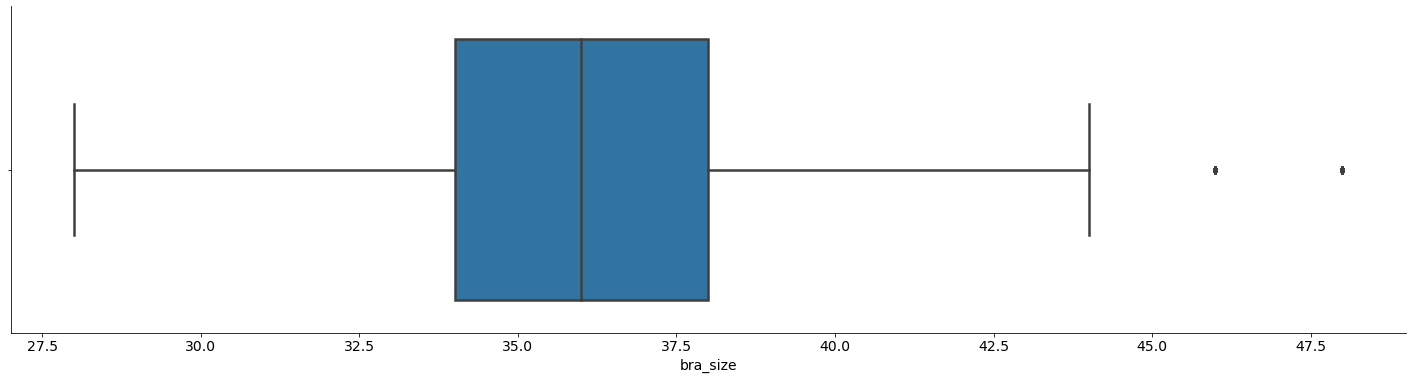

In [ ]:
plot_outlier(mc_df['bra_size'])
# There do seam to follow a pattern any way... two seperate cases outside the box ca 2cm appart, ok

In [ ]:
plot_outlier(mc_df['cup_size'])
#error need numerical value

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1800x432 with 0 Axes>

In [ ]:
plot_outlier(mc_df['height'])
#error need numerical value

TypeError: Horizontal orientation requires numeric `x` variable.

<Figure size 1800x432 with 0 Axes>

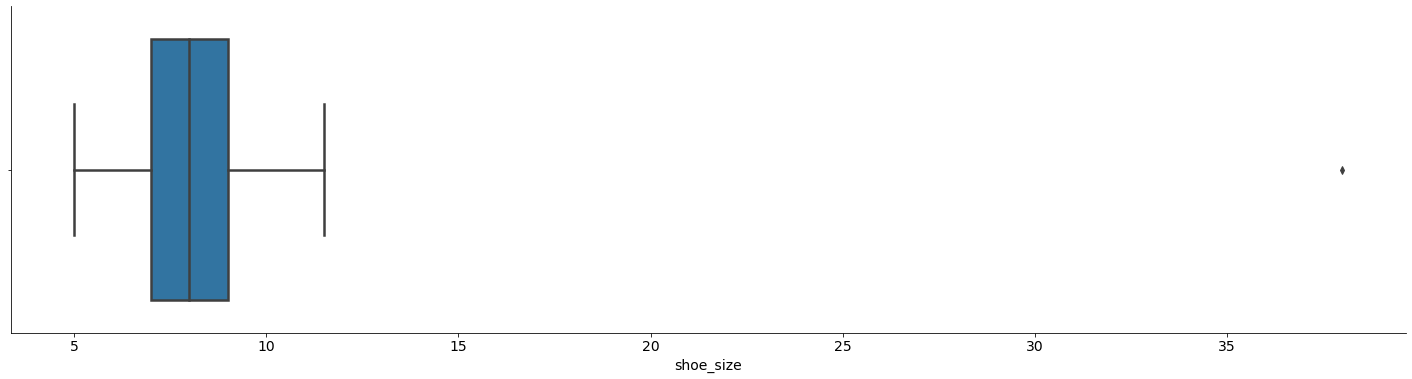

In [ ]:
plot_outlier(mc_df['shoe_size'])
# one way off value 

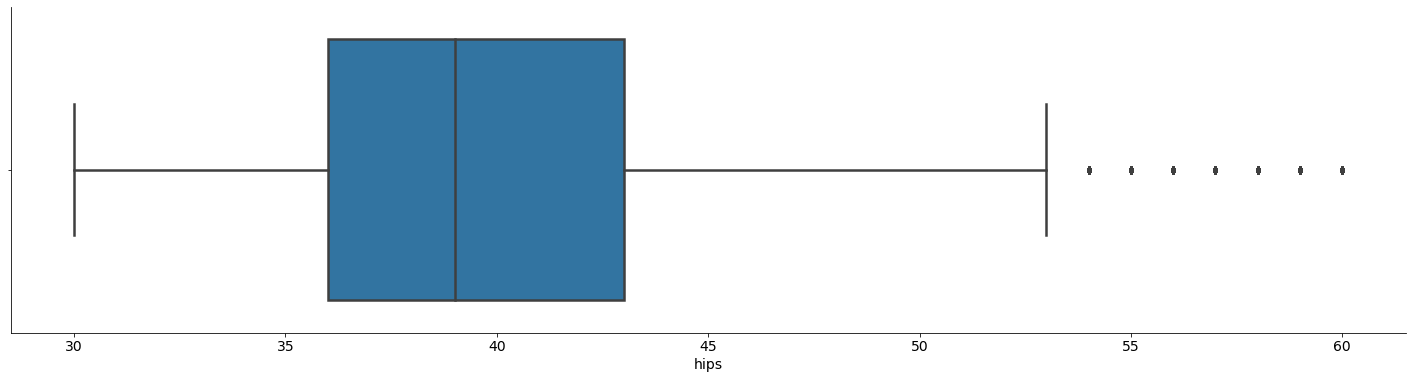

In [ ]:
plot_outlier(mc_df['hips'])
# a few regular distance

In [ ]:
#Summarise missing data and find % of missing data
missing_data_sum = pd.DataFrame({'total missing': mc_df.isnull().sum(),'percentage_missing':((mc_df.isnull().sum()/len(mc_df))*100)})#mc_df.isnull().sum()
#Your code here
#percentage = part / the whole
missing_data_sum

,total missing,percentage_missing
item_id,0,0.000000
waist,79908,96.518903
md_size,0,0.000000
quality,68,0.082136
cup_size,6255,7.555260
hips,26726,32.281677
bra_size,6018,7.268994
category,0,0.000000
bust,70936,85.681846
height,1107,1.337118


In [ ]:
#https://www.kaggle.com/yassirarezki/handling-missing-data-mcar-mar-and-mnar-part-i

In [ ]:
#NMAR (Not Missing At Random) - The data has definatly a pattern, even if we remove the 
#columns that are set by the DBMS (uName, uID, itemID) it is still a clear pattern
#most likely the missing data depends apon what category of products being revieved. 
#If the customer is a first time customer buying one thing or if customer bought alot and and entered alot of data.

In [ ]:
#MAR (Missing At Random) - This could also be the case though we do not really now anything about the entered data as well 
#if it is stored. It could be close but we do not know when the actual entered data was entered only when the rewiev was done.
#some of th values could be 5 or 10 years old.

In [ ]:
#MCAR (Missing Completly At Random) - If the data whould be completely missing at random the percentage whould be somewhat equal. 
#This is not rhe case

In [ ]:
#This whould have been easier to find out if you also had knowlege of the system backend collecting the data.

### Visualize the nonunique observations

Some of the observations contain less unique values than others. The below function visualise values. 

* Create a list that contains  features that you are unsure about whether they are categorial or continous and provide it to the `countplot` function *(max 5 features otherwise it takes to much time)*. 

* Which of the features would you regard as categorial and which are continous based on the visualizations?


In [ ]:
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(mc_df[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

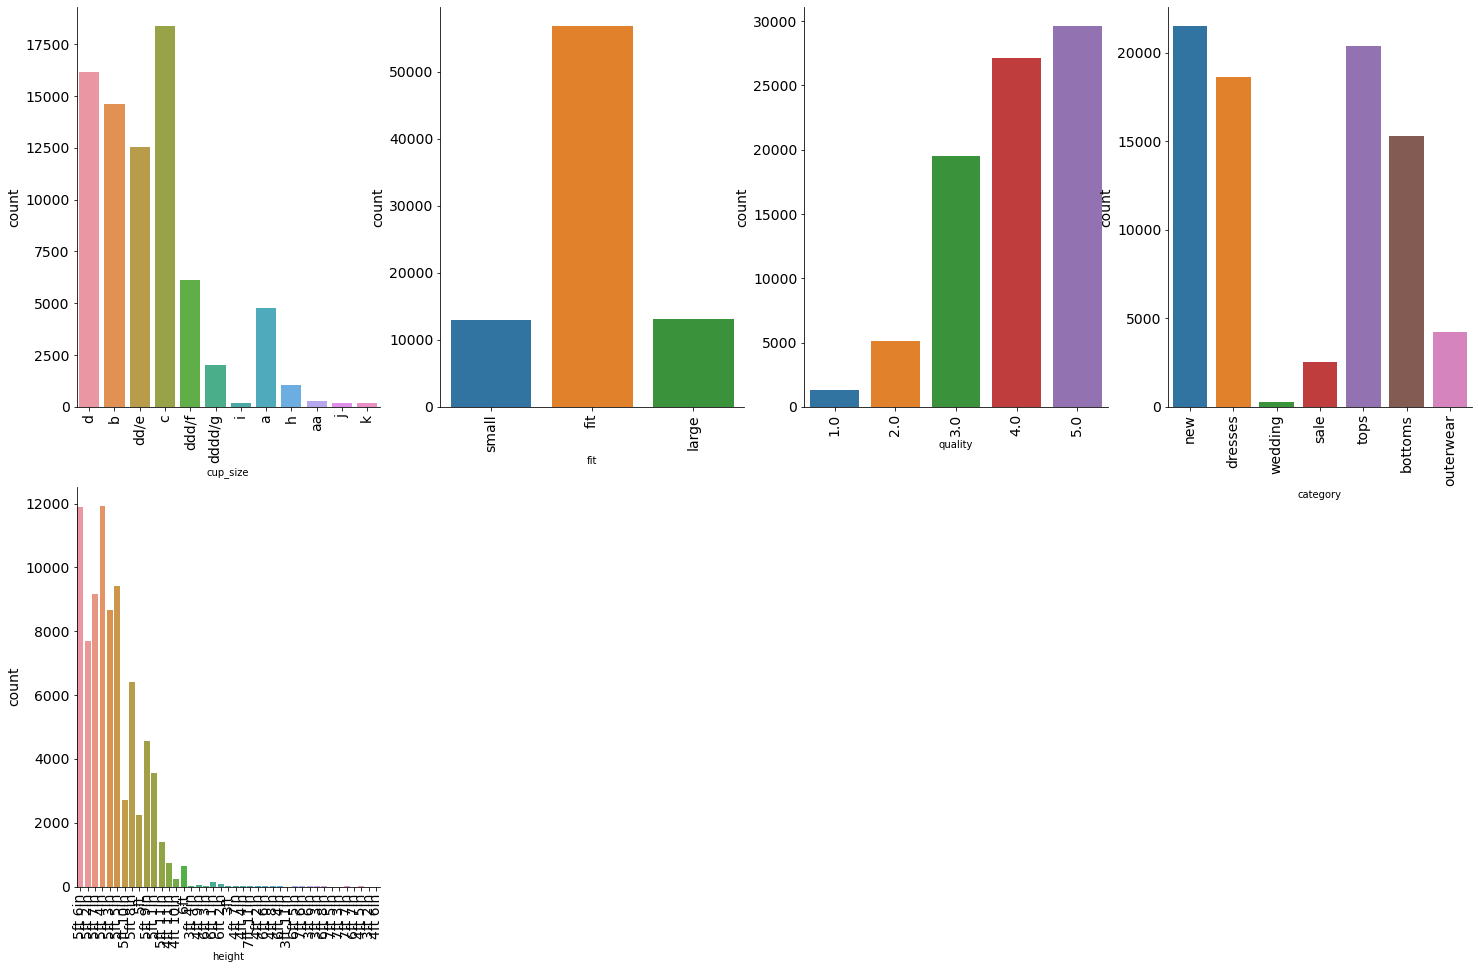

In [ ]:
#List of features and call to function
#Your code here 
newFrame=mc_df[['cup_size','fit','quality','category','height']] 
countplot(newFrame)

#height is probably the only non categorial value due to it's diversity

### Statistical description of numerical variables

Use the built in functions in Pandas to describe common statistics in regards to the numerical features in the dataset.

**Q** 

* What is the mean cup_size?

* What does std stand for?

In [ ]:
#Statistics
#Your code here

#either this
test = mc_df.groupby('cup_size')['bra_size'].mean()
test


#or this because of the folowing question about std

#test2 = mc_df.groupby('cup_size')['bra_size'].std().reset_index()
#test2

cup_size
a         33.962723
aa        33.515358
b         34.960148
c         35.879287
d         36.361056
dd/e      36.829809
ddd/f     37.167649
dddd/g    36.457855
h         37.192308
i         36.571429
j         36.130000
k         37.382979
Name: bra_size, dtype: float64

In [ ]:
# but most likely you want me to convert it to a category filst and then pick out the mean of the sizes
# the mean is easier to figure out if it is turned to a numeric value, i pick 1-12 to represent the sizes
    
# My bra measurement skills aren't the best to know anything obout the different measurements 
def convert_cupsize(cup_size):
    if cup_size == 'a':
        return 2
    elif cup_size == 'aa':
        return 1
    elif cup_size == 'b':
        return 3
    elif cup_size == 'c':
        return 4
    elif cup_size == 'd':
        return 5
    elif cup_size == 'dd/e':
        return 6
    elif cup_size == 'ddd/f':
        return 7
    elif cup_size == 'dddd/g':
        return 8
    elif cup_size == 'h':
        return 9
    elif cup_size == 'i':
        return 10
    elif cup_size == 'j':
        return 11
    elif cup_size == 'k':
        return 12
    else:
        return 0 # noticed later that the 0 corupts the mean() value abit but there is a workaround.

In [ ]:
mc_df['cup_size_numeric'] = mc_df.cup_size.apply(convert_cupsize).astype('int')
mc_df.head(10)

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN,5
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN,3
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN,3
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN,6
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN,3
5,123373,27.0,11,5.0,c,41.0,36.0,new,NaN,5ft 4in,Doreenajane,just right,small,162012,NaN,NaN,NaN,NaN,4
6,123373,26.0,5,1.0,b,NaN,32.0,new,NaN,5ft 3in,barbiejenks,just right,large,114843,NaN,NaN,NaN,NaN,3
7,123373,NaN,11,5.0,d,42.0,38.0,new,NaN,5ft 5in,brettloie,just right,small,58869,8.5,NaN,NaN,NaN,5
8,123373,NaN,30,4.0,d,50.0,42.0,new,NaN,5ft 10in,francescaviola,just right,small,279568,11.0,wide,NaN,NaN,5
9,123373,NaN,13,5.0,dd/e,41.0,36.0,new,39,5ft 6in,laurenpolzin,just right,fit,950172,9.0,NaN,NaN,NaN,6


In [ ]:
#mc_df.info()
cupsizemean = mc_df.cup_size_numeric.mean()
cupsizemean
#the answer is that the mean cupsize is between C and D

4.323420702983452

In [ ]:
# What std stand for depends apon it's context 
# "standard" is a common acronym
# In pandas it is "standard deviation"

### Further investigation of (some) individual features



* **shoe_size**: 

  **Q**:

* How does the row(s) containing outlier(s) in the shoe_size feature look like?

* What is a suitable way of handling the identified outlier(s) in the shoe_size column? Why? Also, handle the outlier in shoe_size appropriately.



In [ ]:
#We looked at it above..

#https://en.wikipedia.org/wiki/Interquartile_range
def get_outlier_ranges(feature_column):
    #sorted(feature_column)
    q1,q3 = np.percentile(feature_column, [25,75])
    print(feature_column)
    iqr = q3 - q1
    return (q1-(1.5*iqr)), (q3+(1.5*iqr))

In [ ]:
shoe_size_only = mc_df.shoe_size.dropna()
#View the row that contains the outlier in shoe_size
lower, upper = get_outlier_ranges(shoe_size_only)
mc_df[(mc_df.shoe_size > upper)]
# 1:you could convert it from european to american, one can remove it, or just skip all outliers


2         9.0
7         8.5
8        11.0
9         9.0
16        8.5
         ... 
82779     7.5
82781     6.5
82783     6.0
82784     6.5
82785     8.5
Name: shoe_size, Length: 27915, dtype: float64


,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
37313,416942,35.0,12,5.0,d,46.0,36.0,new,37-39,5ft 5in,Catslittle,just right,fit,237498,38.0,average,Cardigans are best item Mod Cloth has,"I love these cardigans, my favorite, good fabr...",5


In [ ]:
#Handle the outlier
mc_df = mc_df.drop(mc_df[(mc_df.shoe_size > upper)].index)
mc_df.reset_index(drop = True, inplace = True)
mc_df[(mc_df.shoe_size > upper)]


,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric


## Joint Distribution visualizations
Create a visualization that shows the joint distribution of bra_size vs size (bivariate) to get an understanding about the values.

**Q:** 
* What does the visualization tell us?

* Can you suggest and implement a visualisation that shows the relationship between the two variables in a clearer way?



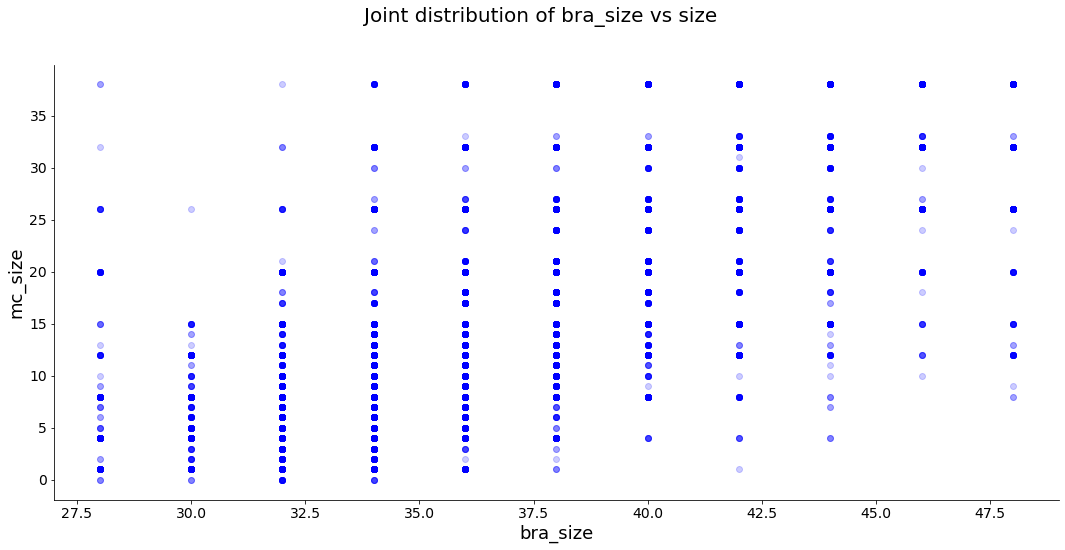

In [ ]:
plt.figure(figsize=(18,8))
plt.xlabel("bra_size", fontsize=18)
plt.ylabel("mc_size", fontsize=18)
plt.suptitle("Joint distribution of bra_size vs size", fontsize= 20)
plt.plot(mc_df.bra_size, mc_df['md_size'], 'bo', alpha=0.2)
plt.show()

# It tells us the bra_size compared to the md_size what meaning that has in measurements i have no clue  

# I could probably make an average value of mc_size and plot it just a line chart 

# or see next box

<AxesSubplot:xlabel='bra_size', ylabel='md_size'>

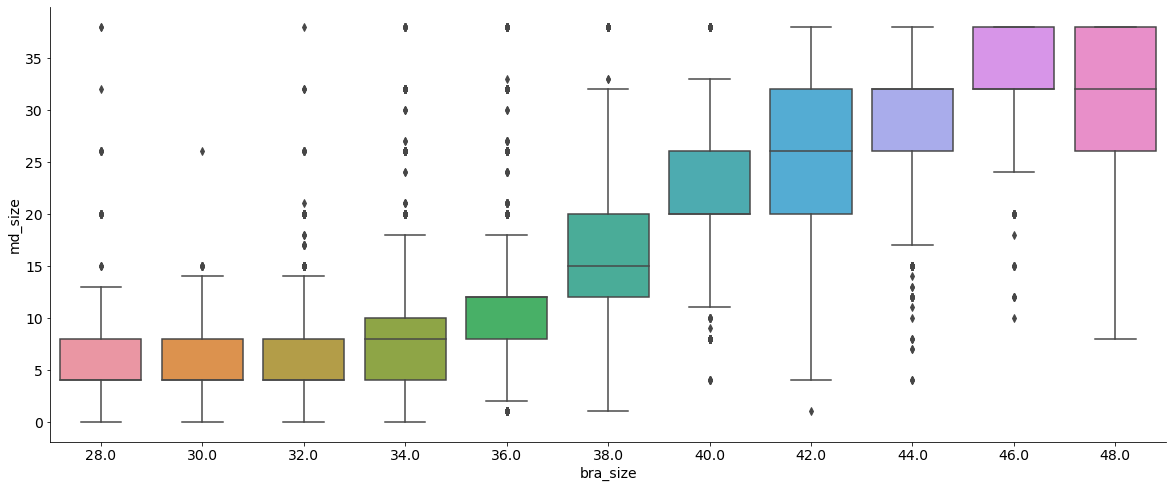

In [ ]:
sns.boxplot(y=mc_df['md_size'],x=mc_df['bra_size'])

## Step-by-step features processing:






* **bra_size:**  Looks numerical, but the range is only from 28 to 48, with most of the sizing lying around 34-38. 

  **Q**: What is a more sensible dtype? Change to this type instead of the present one.

  * There are some NA values, this might be due to the store not having this data (yet). Create an 'Unknown' category to replace NA values. 

In [ ]:
#Fix bra_size column
mc_df.bra_size = mc_df.bra_size.fillna('0')
mc_df.bra_size = mc_df.bra_size.astype('int')#.cat.as_ordered()
mc_df.bra_size

0        34
1        36
2        32
3         0
4        36
         ..
82784    36
82785    34
82786    32
82787     0
82788    32
Name: bra_size, Length: 82789, dtype: int64

* **bust:** 

  **Q**: 
  * What can you infer by looking at the values which are not null? 
  
  * Which dtype is most suitable for bust feature?  Change into this dtype.
  
  We also need to handle a special case where bust is given as - '37-39'. Replace the entry of '37-39' with the mean. 

In [ ]:
#Fix bust column
# List non nan rows
# first get id  37313 416942 
#mc_df2 = mc_df 
mc_df.bust = mc_df.bust.fillna('0') 

# just to get id number
#mc_df2.bust = mc_df2[mc_df2['bust'].str.contains('37-39')]

# when run the case of'37-39' is already gone since it was removed with shoe size outlier row. if not this works to...
# since index was reset it shanged the row to the row under
mc_df.bust = mc_df.bust.replace(to_replace='37-39',value='38').astype(int)
mc_df.iloc[[37313]]

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
37313,416942,47.0,32,4.0,c,59.0,42,new,0,5ft 10in,cterry4,just right,fit,481560,NaN,NaN,Love the color! Almost a,Love the color! Almost a deep teal. I like to ...,4


* **category:** none missing; change to dtype category.


In [ ]:
#Fix category column

mc_df.category = mc_df.category.astype('category').cat.as_ordered()
mc_df.category

0              new
1              new
2              new
3              new
4              new
           ...    
82784    outerwear
82785    outerwear
82786    outerwear
82787    outerwear
82788    outerwear
Name: category, Length: 82789, dtype: category
Categories (7, object): ['bottoms' < 'dresses' < 'new' < 'outerwear' < 'sale' < 'tops' < 'wedding']


* **cup_size:** Change the dtype to *category* for this column. This column has around 7% missing values. Take a look at the rows where this value is missing. 

In [ ]:
#Fix cup_size column and view a sample of 20 rows where this value is missing
mc_df.cup_size = mc_df.cup_size.fillna('unknown')
mc_df.cup_size = mc_df.cup_size.astype('category').cat.as_ordered()
mc_df.cup_size

0              d
1              b
2              b
3           dd/e
4              b
          ...   
82784          b
82785      ddd/f
82786     dddd/g
82787    unknown
82788          d
Name: cup_size, Length: 82789, dtype: category
Categories (13, object): ['a' < 'aa' < 'b' < 'c' ... 'i' < 'j' < 'k' < 'unknown']

>We can't see anything glaring from the rows where this data is missing, however, as per the curator of the dataset- "***Note that these datasets are highly sparse, with most products and customers having only a single transaction.***" It does point to that maybe these customers have not bought lingerie from modcloth yet and so modcloth does not have that data. So, it makes sense to fill these null values as 'Unknown'. From the prevalence of the values like dd/e, ddd/f, and dddd/g, we can assume these to be legit cup_sizes, also confirmed by [**this**](https://www.herroom.com/full-figure-bra-cup-sizing,905,30.html) article, where some brands change the cup size dd to e, ddd to f etc. We can directly convert this to *category* dtype.

* **fit:** Change the dtype to *category* for this column. 

  **Q**: 

  Which feedback has the vast majority of customers given for the fit feature for items on Modcloth?

In [ ]:
#Fix fit column and find the most common value
#mc_df.fit = mc_df.fit.fillna('unknown')
mc_df.fit = mc_df.fit.astype('category').cat.as_ordered()
mc_df.fit

0        small
1        small
2        small
3          fit
4        small
         ...  
82784      fit
82785    small
82786      fit
82787      fit
82788      fit
Name: fit, Length: 82789, dtype: category
Categories (3, object): ['fit' < 'large' < 'small']

In [ ]:
#Fix bra_size column
mc_df.bra_size = mc_df.bra_size.fillna('unknown')
mc_df.bra_size = mc_df.bra_size.astype('category').cat.as_ordered()
mc_df.bra_size
#changed to category most for fun to see if int can act as category 

0        34
1        36
2        32
3         0
4        36
         ..
82784    36
82785    34
82786    32
82787     0
82788    32
Name: bra_size, Length: 82789, dtype: category
Categories (12, int64): [0 < 28 < 30 < 32 ... 42 < 44 < 46 < 48]

In [ ]:
# Feedback 
mc_df.review_summary = mc_df.review_summary.fillna('unknown')
mc_df.review_text = mc_df.review_text.fillna('unknown') 
feedback = mc_df[['quality','review_summary','review_text']].dropna()  
#the only needed columns drop nan
feedback = feedback[feedback['review_text'].str.contains('fit')]
#of all review texts caontaining the keyword "fit" gives an owerall rating of 4 the total average seams to be slightly lower though.
feedback.quality.mean(),mc_df.quality.mean()

(4.016679302501895, 3.949045586973078)

* **height:** We need to parse the height column as currently it is a string object to a numerical form which is more suitable.  

Further:

  * Convert height to centimeters instead of inches and feet. This is done in the code below, comment it so it is understandable what it does.

  * How many values are missing?

  * How many outliers exist? What is suitable to do with the rows containing outliers based on this numer?

* Investigate the first 20 rows where the height data is missing. What does it tell us about the customers representing these rows?



In [ ]:
#Convert inches and feet to centimeters
def height_in_cms(ht):
  if ht.lower() != 'nan':# sort out Null values
    ht = ht.replace('ft','').replace('in', '')# removes ft and inch coments
    h_ft = int(ht.split()[0]) # feet to int
    if len(ht.split()) > 1:# if there is a rest there is inches  
      h_inch = int(ht.split()[1]) 
    else: 
      h_inch = 0 
    # multiply and sum result to centimeters
    h_inch += h_ft * 12 
    h_cm = round(h_inch * 2.54, 1)
    return h_cm

mc_df.height = mc_df.height.astype(str).apply(height_in_cms)
mc_df.head()

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
0,123373,29.0,7,5.0,d,38.0,34,new,36,167.6,Emily,just right,small,991571,NaN,NaN,unknown,unknown,5
1,123373,31.0,13,3.0,b,30.0,36,new,0,157.5,sydneybraden2001,just right,small,587883,NaN,NaN,unknown,unknown,3
2,123373,30.0,7,2.0,b,NaN,32,new,0,170.2,Ugggh,slightly long,small,395665,9.0,NaN,unknown,unknown,3
3,123373,NaN,21,5.0,dd/e,NaN,0,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,unknown,unknown,6
4,123373,NaN,18,5.0,b,NaN,36,new,0,157.5,dberrones1,slightly long,small,944840,NaN,NaN,unknown,unknown,3


In [ ]:
mc_df[mc_df.height.isnull()].head(20)
# Do look at the output to be able to better understand the inferences!

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
3,123373,NaN,21,5.0,dd/e,NaN,0,new,0,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,unknown,unknown,6
17,123373,NaN,15,4.0,dddd/g,NaN,36,new,0,NaN,Megan,just right,large,128353,NaN,NaN,unknown,unknown,8
43,123373,NaN,15,5.0,dd/e,NaN,36,new,0,NaN,sdhewey,just right,fit,670919,NaN,NaN,unknown,unknown,6
73,124124,NaN,20,4.0,c,NaN,38,new,0,NaN,Fiorella,just right,large,816504,NaN,NaN,unknown,unknown,4
131,124124,NaN,12,3.0,c,NaN,36,new,0,NaN,jmcrowder.1124,very short,fit,846091,NaN,NaN,unknown,unknown,4
213,124124,NaN,20,4.0,d,NaN,40,new,0,NaN,rhea_heather,just right,fit,121007,NaN,NaN,unknown,unknown,5
382,125442,NaN,5,5.0,b,NaN,34,new,0,NaN,kelsi.flatland,just right,large,5752,NaN,NaN,unknown,unknown,3
423,125442,NaN,7,5.0,c,NaN,34,new,0,NaN,Naomi,just right,fit,563612,NaN,NaN,unknown,unknown,4
456,125442,NaN,7,5.0,b,NaN,38,new,0,NaN,shirawzn,just right,fit,968605,NaN,NaN,unknown,unknown,3
475,125442,NaN,7,5.0,dd/e,36.0,30,new,0,NaN,Ingrid,just right,small,940714,NaN,NaN,unknown,unknown,6


> This filtering gives us interesting observations here:
> 1. Some customers have given bra_size, cup_size data, whereas all other measurements are empty. **Possible first-time purchase at Modcloth for lingerie!**
> 2. Some customers have given shoe_size and all other measurements are empty. **Possible first-time purchase at Modcloth for shoes!**
>     

**It leads us to saying that there are some first-time buyers in the dataset** (let us remeber this for later)

  **Q:** 

  * How can we support this assumption by looking at the data? 
  
  * How many missing values exist in the height feature. 
  
  * What is a suitable course of action for height feature with missing rows?



In [ ]:
#Count and handle missing rows 

# in an earlier test i found missing values for height is : 
# height             1107

# either i replace it with -1 or 0 something that is easy to see as nonexistant
# we can also remove the rows but will be destructive for the future for all other data.
# or you can calculate an average from all other similar values that might give an truer clue
# or simply replace with .mean() which seams like the best and easiest option
to_average = mc_df.height.dropna()
the_mean = to_average.mean()
the_mean
mc_df2 = mc_df
mc_df2.height = mc_df2.height.fillna(the_mean)
mc_df2

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
0,123373,29.0,7,5.0,d,38.0,34,new,36,167.600000,Emily,just right,small,991571,NaN,NaN,unknown,unknown,5
1,123373,31.0,13,3.0,b,30.0,36,new,0,157.500000,sydneybraden2001,just right,small,587883,NaN,NaN,unknown,unknown,3
2,123373,30.0,7,2.0,b,NaN,32,new,0,170.200000,Ugggh,slightly long,small,395665,9.0,NaN,unknown,unknown,3
3,123373,NaN,21,5.0,dd/e,NaN,0,new,0,165.472617,alexmeyer626,just right,fit,875643,NaN,NaN,unknown,unknown,6
4,123373,NaN,18,5.0,b,NaN,36,new,0,157.500000,dberrones1,slightly long,small,944840,NaN,NaN,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,NaN,8,4.0,b,NaN,36,outerwear,0,172.700000,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,3
82785,807722,NaN,12,5.0,ddd/f,NaN,34,outerwear,0,165.100000,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,NaN,12,5.0,dddd/g,36.0,32,outerwear,0,162.600000,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,NaN,12,4.0,unknown,NaN,0,outerwear,0,160.000000,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


* **hips:**
Hips column has a lot of missing values ~ 32.28%! We know this data would possibly be missing because Modcloth never got this data from the user most probably. We cannot remove such a significant chunk of the data, so we need another way of handling this feature. We will bin the data- on the basis of quartiles. This is done in the code below. 

* Explain what the code does and what the result is. 


In [ ]:
# Handling hips column
mc_df.hips = mc_df.hips.fillna(-1.0)
#fills with
bins = [-5,0,31,37,40,44,75]

labels = ['unknown','XS','S','M', 'L','XL']

# it replaces -5 and 0 with 'unknown' 
# and coresponding value with label in the column hips
mc_df.hips = pd.cut(mc_df.hips, bins, labels=labels)
mc_df

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,shoe_width,review_summary,review_text,cup_size_numeric
0,123373,29.0,7,5.0,d,M,34,new,36,167.600000,Emily,just right,small,991571,NaN,NaN,unknown,unknown,5
1,123373,31.0,13,3.0,b,XS,36,new,0,157.500000,sydneybraden2001,just right,small,587883,NaN,NaN,unknown,unknown,3
2,123373,30.0,7,2.0,b,unknown,32,new,0,170.200000,Ugggh,slightly long,small,395665,9.0,NaN,unknown,unknown,3
3,123373,NaN,21,5.0,dd/e,unknown,0,new,0,165.472617,alexmeyer626,just right,fit,875643,NaN,NaN,unknown,unknown,6
4,123373,NaN,18,5.0,b,unknown,36,new,0,157.500000,dberrones1,slightly long,small,944840,NaN,NaN,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,NaN,8,4.0,b,unknown,36,outerwear,0,172.700000,Jennifer,just right,fit,727820,8.5,average,Cute jacket!,Cute jacket!,3
82785,807722,NaN,12,5.0,ddd/f,unknown,34,outerwear,0,165.100000,Kelli,slightly long,small,197040,NaN,NaN,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,NaN,12,5.0,dddd/g,S,32,outerwear,0,162.600000,elacount,just right,fit,102493,NaN,NaN,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,NaN,12,4.0,unknown,unknown,0,outerwear,0,160.000000,jennaklinner,just right,fit,756491,NaN,NaN,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


* **length:** There are only 35 missing rows in length, we'll take a look at these. We saw that most probably the customers did not leave behind the feedback or the data was corrupted in these rows. However, we should be able to impute these values using review related fields (if they are filled!). Or we could also simply choose to remove these rows. For the sake of this analysis, we will remove these rows.


In [ ]:
# Handling length column
missing_rows = mc_df[mc_df.length.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)

* **quality:** There are only 68 missing rows in quality, we'll took a look at these. Similarly to length, the customers did not leave behind the feedback or the data was corrupted in these rows. We will remove these rows and convert the dtype to an ordinal variable (ordered categorical).

In [ ]:
# Handling quality
missing_rows = mc_df[mc_df.quality.isnull()].index
mc_df.drop(missing_rows, axis = 0, inplace=True)
mc_df.quality = mc_df.quality.astype('category').cat.as_ordered()

* **review_summary/ review_text**- The NA values are there because these reviews are simply not provided by customers. Let's just fill those as 'Unknown'.


In [ ]:
#Handling review_summare/review_text
# Already done this in the "fit" column review quality question. 

* **shoe_size** -  Roughly 66.3% of the shoe_size data is missing. We will change the shoe_size into *category* dtype and fill the NA values as 'Unknown'.


In [ ]:
#Handling shoe_size
mc_df.shoe_size = mc_df.shoe_size.fillna('unknown')
mc_df.shoe_size = mc_df.shoe_size.astype('category').cat.as_ordered()
mc_df.shoe_size

0        unknown
1        unknown
2              9
3        unknown
4        unknown
          ...   
82784        8.5
82785    unknown
82786    unknown
82787    unknown
82788    unknown
Name: shoe_size, Length: 82696, dtype: category
Categories (15, object): [5 < 5.5 < 6 < 6.5 ... 10.5 < 11 < 11.5 < 'unknown']

* **shoe_width** - Roughly 77.5% of the shoe_width data is missing, drop this column.


In [ ]:
#Handling shoe_width
mc_df = mc_df.drop(['shoe_width'], axis=1)
mc_df

,item_id,waist,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,review_summary,review_text,cup_size_numeric
0,123373,29.0,7,5.0,d,M,34,new,36,167.600000,Emily,just right,small,991571,unknown,unknown,unknown,5
1,123373,31.0,13,3.0,b,XS,36,new,0,157.500000,sydneybraden2001,just right,small,587883,unknown,unknown,unknown,3
2,123373,30.0,7,2.0,b,unknown,32,new,0,170.200000,Ugggh,slightly long,small,395665,9,unknown,unknown,3
3,123373,NaN,21,5.0,dd/e,unknown,0,new,0,165.472617,alexmeyer626,just right,fit,875643,unknown,unknown,unknown,6
4,123373,NaN,18,5.0,b,unknown,36,new,0,157.500000,dberrones1,slightly long,small,944840,unknown,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,NaN,8,4.0,b,unknown,36,outerwear,0,172.700000,Jennifer,just right,fit,727820,8.5,Cute jacket!,Cute jacket!,3
82785,807722,NaN,12,5.0,ddd/f,unknown,34,outerwear,0,165.100000,Kelli,slightly long,small,197040,unknown,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,NaN,12,5.0,dddd/g,S,32,outerwear,0,162.600000,elacount,just right,fit,102493,unknown,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,NaN,12,4.0,unknown,unknown,0,outerwear,0,160.000000,jennaklinner,just right,fit,756491,unknown,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


* **waist**- Waist column has the highest number of missing values - 96.5%! We will drop this column.


In [ ]:
#Handling waist
mc_df = mc_df.drop(['waist'], axis=1)
mc_df

,item_id,md_size,quality,cup_size,hips,bra_size,category,bust,height,user_name,length,fit,user_id,shoe_size,review_summary,review_text,cup_size_numeric
0,123373,7,5.0,d,M,34,new,36,167.600000,Emily,just right,small,991571,unknown,unknown,unknown,5
1,123373,13,3.0,b,XS,36,new,0,157.500000,sydneybraden2001,just right,small,587883,unknown,unknown,unknown,3
2,123373,7,2.0,b,unknown,32,new,0,170.200000,Ugggh,slightly long,small,395665,9,unknown,unknown,3
3,123373,21,5.0,dd/e,unknown,0,new,0,165.472617,alexmeyer626,just right,fit,875643,unknown,unknown,unknown,6
4,123373,18,5.0,b,unknown,36,new,0,157.500000,dberrones1,slightly long,small,944840,unknown,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,8,4.0,b,unknown,36,outerwear,0,172.700000,Jennifer,just right,fit,727820,8.5,Cute jacket!,Cute jacket!,3
82785,807722,12,5.0,ddd/f,unknown,34,outerwear,0,165.100000,Kelli,slightly long,small,197040,unknown,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,12,5.0,dddd/g,S,32,outerwear,0,162.600000,elacount,just right,fit,102493,unknown,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,12,4.0,unknown,unknown,0,outerwear,0,160.000000,jennaklinner,just right,fit,756491,unknown,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


* **bust**- 85.6% missing values and highly correlated to bra_size. Remove.


In [ ]:
#Handling bust
mc_df = mc_df.drop(['bust'], axis=1)
mc_df

,item_id,md_size,quality,cup_size,hips,bra_size,category,height,user_name,length,fit,user_id,shoe_size,review_summary,review_text,cup_size_numeric
0,123373,7,5.0,d,M,34,new,167.600000,Emily,just right,small,991571,unknown,unknown,unknown,5
1,123373,13,3.0,b,XS,36,new,157.500000,sydneybraden2001,just right,small,587883,unknown,unknown,unknown,3
2,123373,7,2.0,b,unknown,32,new,170.200000,Ugggh,slightly long,small,395665,9,unknown,unknown,3
3,123373,21,5.0,dd/e,unknown,0,new,165.472617,alexmeyer626,just right,fit,875643,unknown,unknown,unknown,6
4,123373,18,5.0,b,unknown,36,new,157.500000,dberrones1,slightly long,small,944840,unknown,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,8,4.0,b,unknown,36,outerwear,172.700000,Jennifer,just right,fit,727820,8.5,Cute jacket!,Cute jacket!,3
82785,807722,12,5.0,ddd/f,unknown,34,outerwear,165.100000,Kelli,slightly long,small,197040,unknown,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,12,5.0,dddd/g,S,32,outerwear,162.600000,elacount,just right,fit,102493,unknown,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,12,4.0,unknown,unknown,0,outerwear,160.000000,jennaklinner,just right,fit,756491,unknown,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


* **user_name**- user_name itself is not needed with the user_id given. Remove.



In [ ]:
#Handling user_name
mc_df = mc_df.drop(['user_name'], axis=1)
mc_df

,item_id,md_size,quality,cup_size,hips,bra_size,category,height,length,fit,user_id,shoe_size,review_summary,review_text,cup_size_numeric
0,123373,7,5.0,d,M,34,new,167.600000,just right,small,991571,unknown,unknown,unknown,5
1,123373,13,3.0,b,XS,36,new,157.500000,just right,small,587883,unknown,unknown,unknown,3
2,123373,7,2.0,b,unknown,32,new,170.200000,slightly long,small,395665,9,unknown,unknown,3
3,123373,21,5.0,dd/e,unknown,0,new,165.472617,just right,fit,875643,unknown,unknown,unknown,6
4,123373,18,5.0,b,unknown,36,new,157.500000,slightly long,small,944840,unknown,unknown,unknown,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82784,807722,8,4.0,b,unknown,36,outerwear,172.700000,just right,fit,727820,8.5,Cute jacket!,Cute jacket!,3
82785,807722,12,5.0,ddd/f,unknown,34,outerwear,165.100000,slightly long,small,197040,unknown,It's a beautiful jacket.,It's a beautiful jacket. I love how it's knit ...,7
82786,807722,12,5.0,dddd/g,S,32,outerwear,162.600000,just right,fit,102493,unknown,I love this blazer. It is,I love this blazer. It is a great office piece...,8
82787,807722,12,4.0,unknown,unknown,0,outerwear,160.000000,just right,fit,756491,unknown,I love this blazer!! I wo,I love this blazer!! I wore it yesterday and g...,0


Run the function for plotting features again to see how the features look like after our changes, only plot categorial variables.

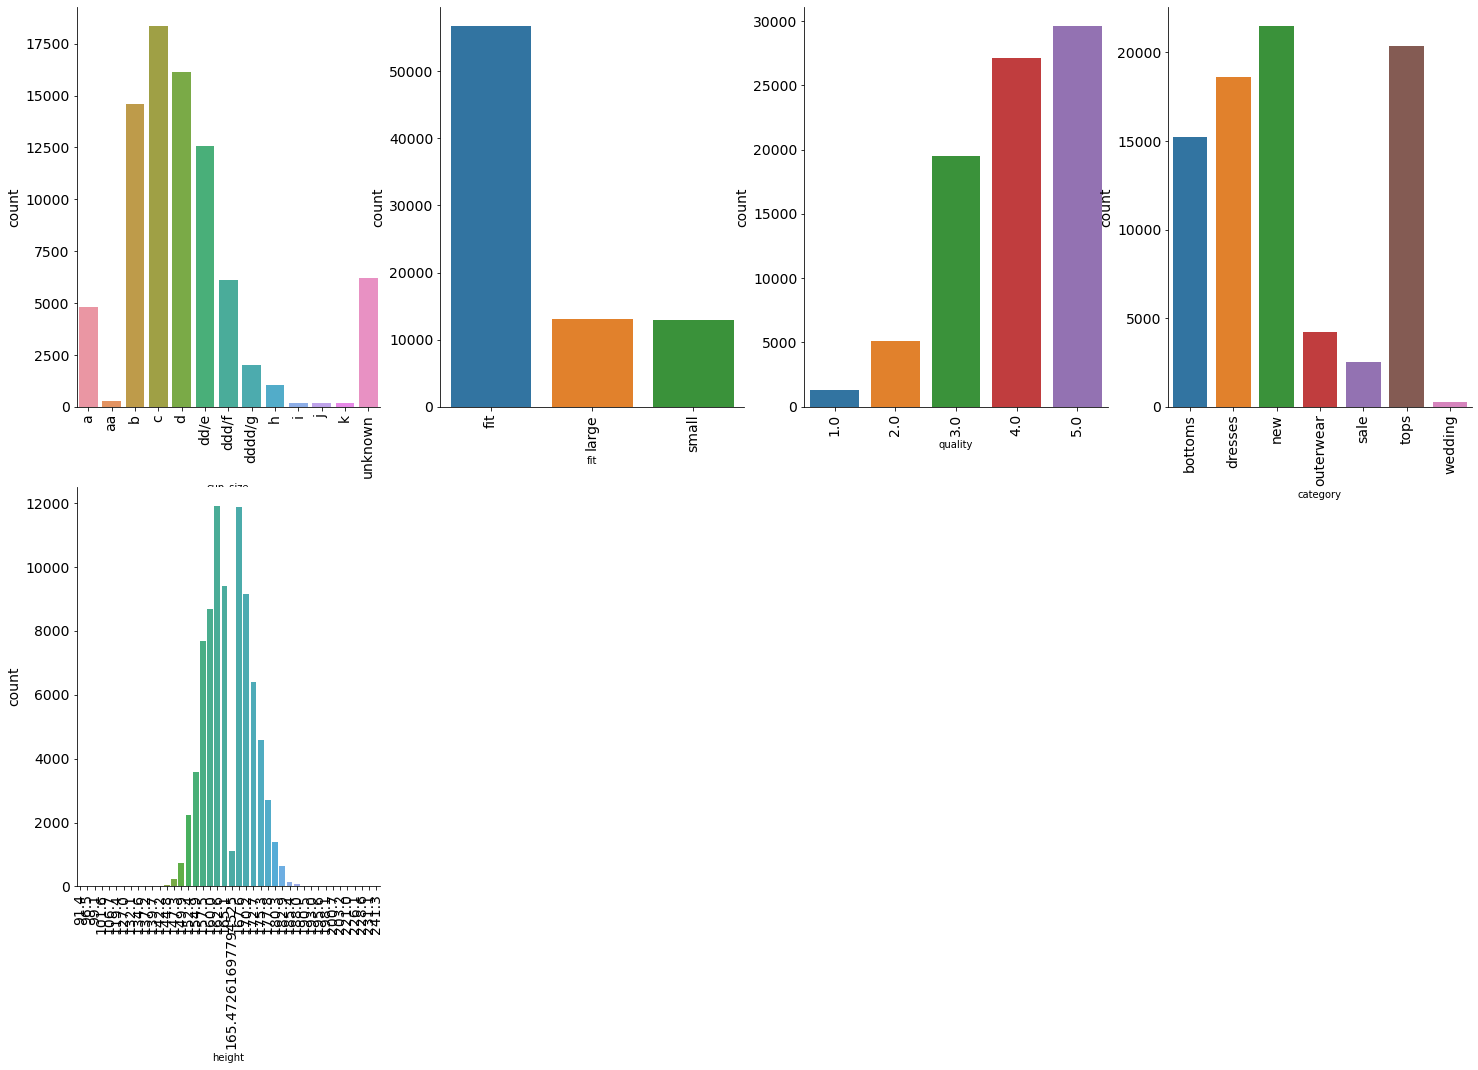

In [ ]:
#Create list and call function to plot features
newFrame=mc_df[['cup_size','fit','quality','category','height']] 
countplot(newFrame)

#All of them is now following the tau (normalisation curve) alot better

In [ ]:
# to be able to do "feature engineering part" we're restarting a bit.
mc_df2= pd.read_json("modcloth_final_data.json", lines=True)
mc_df2.columns = mc_df2.columns.str.replace(r'\s+', '_')
mc_d2=mc_df2.rename(columns={"size":"md_size"})


#complete=mc_df2.info(verbose=True)
#complete

> # Feature Engineering 
> ## Creating a new feature of first_time_buyer
> 
> Building on our observations above, it makes sense to identify the transactions which belong to first time users. We use the following logic to identify such first time transactions in the dataset:
> * If bra_size/cup_size have a value and height, hips, shoe_size, and waist do not we conclude **it is a first time buyer of lingerie**.
> * If shoe_size have a value and bra_size, cup_size, height, hips, and waist do not we conclude: **it is a first time buyer of shoes**.
> * If hips/waist have a value and bra_size, cup_size, height, shoe_size do not: we conclude: **it is a first time buyer of a dress/tops**.
> 


>Now we add a new column to the original data- *first_time_user*, which is a bool feature which indicates if a user, of a transaction, is a first-time user or not. This is based on the grounds that Modcloth has no previous information about the person, infact it is possible that the new user did multiple transactions in the first time!

In [ ]:
lingerie_cond = (((mc_df2.bra_size.isnull()) | (mc_df2.cup_size.isnull())) & (mc_df2.height.isnull()) & (mc_df2.hips.isnull()) &
(mc_df2.shoe_size.isnull()))
shoe_cond = ((mc_df2.bra_size.isnull()) & (mc_df2.cup_size.isnull()) & (mc_df2.height.isnull()) & (mc_df2.hips.isnull()) &
((mc_df2.shoe_size.notnull())))
dress_cond = ((mc_df2.bra_size.isnull()) & (mc_df2.cup_size.isnull()) & (mc_df2.height.isnull()) & ((mc_df2.hips.notnull())) &
(mc_df2.shoe_size.isnull()))

In [ ]:
mc_df2['first_time_user'] = (lingerie_cond | shoe_cond | dress_cond)
print("Column added!")
print("Total transactions by first time users who bought bra, shoes, or a dress: " + str(sum(mc_df2.first_time_user)))
print("Total first time users: " + str(len(mc_df[(lingerie_cond | shoe_cond | dress_cond)].user_id.unique())))


Column added!
Total transactions by first time users who bought bra, shoes, or a dress: 383
Total first time users: 356


**Q**

* How many `first_time_users` did you identify?

* How many transactions were made by `first_time_users` who bought bra, shoes, or a dress?

In [ ]:
# 243

# 383

**Q** Are there any missing values left in our dataframe?

In [ ]:
# in the old one nothing is lefts
null_counts = m356c_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

Series([], dtype: int64)

In [ ]:
# in the new unspoild one there is yes
null_counts = mc_df2.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

waist             79908
bust              70936
shoe_width        64183
shoe_size         54875
hips              26726
review_text        6725
review_summary     6725
cup_size           6255
bra_size           6018
height             1107
quality              68
length               35
dtype: int64


## Distribution of different features 

Now we want to review our remaining features again to see how they look after our cleaning and pre-processing. 

* Call the plotting function again with a list of all categorial values.

* Create a function that plots the continous variables in the dataset and call it with a list of the continous variables. 

**Q**

* What are your observations in regards to the distribution of the data in remaining features? 





In [ ]:
#Function for plotting continous features
def plot_dist(df, independent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None

In [ ]:
#Call the function to plot the continous features.

#newframe = mc_df['md_size']
#plot_dist(newframe, )
#complete=mc_df.info(verbose=True)

# There is not enought continuous culumns to run this one 
complete=mc_df.info(verbose=True)
complete

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82696 entries, 0 to 82788
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   item_id           82696 non-null  int64   
 1   md_size           82696 non-null  int64   
 2   quality           82696 non-null  category
 3   cup_size          82696 non-null  category
 4   hips              82696 non-null  category
 5   bra_size          82696 non-null  category
 6   category          82696 non-null  category
 7   height            82696 non-null  float64 
 8   length            82696 non-null  object  
 9   fit               82696 non-null  category
 10  user_id           82696 non-null  int64   
 11  shoe_size         82696 non-null  category
 12  review_summary    82696 non-null  object  
 13  review_text       82696 non-null  object  
 14  cup_size_numeric  82696 non-null  int64   
dtypes: category(7), float64(1), int64(4), object(3)
memory usage: 8.7+ MB


* What do the different visualizations tell us about individual features?

<a id="14"></a>
## Categories vs. Fit, Length and Quality
Here, we will visualize how the items of different categories fared in terms of - fit, length, and quality. This will tell Modcloth which categories need more attention! 

I have plotted 2 distributions in categories here:

**1. Unnormalized**- viewing the frequency counts directly- for comparison across categories. We also include the best fit, length, or quality measure in this plot.

**2. Normalized** -  viewing the distribution for the category after normalizing the counts, amongst the category itself- it will help us compare what are major reason for return amongst the category itself. We exclude the best sizing & quality measures, so as to focus on the pre-dominant reasons of return per category (if any).

In [ ]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  Modcloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)
    
def norm_counts(t):
    norms = np.linalg.norm(t.fillna(0), axis=1)
    t_norm = t[0:0]
    for row, euc in zip(t.iterrows(), norms):
        t_norm.loc[row[0]] = list(map(lambda x: x/euc, list(row[1])))
    return t_norm

- **Category vs. Fit**

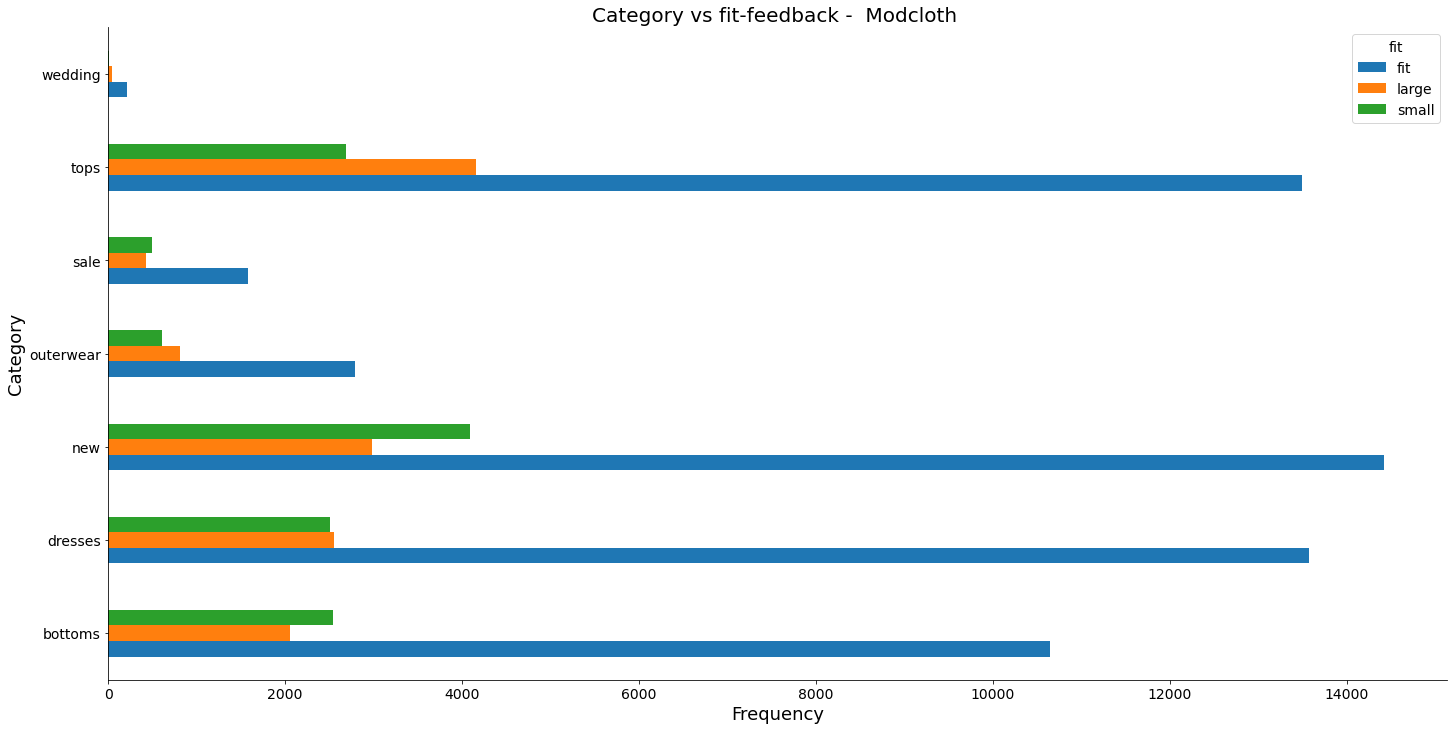

In [ ]:
g_by_category = mc_df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
cat_fit = cat_fit.unstack()
cat_fit_norm = norm_counts(cat_fit)
cat_fit_norm.drop(['fit'], axis=1, inplace=True)
plot_barh(cat_fit, 'fit')


* Which categories have the best fit response (`fit`)  
* Which categories have the worst fit-feedback?  


In [ ]:
# considering this is only cases and not persentage per category i would say the dresses category 

# For this we have to add the small and large stacks togather to really visualise 
# i think sale has the highest added stacks compared to the fit stack 

- **Category vs Length**

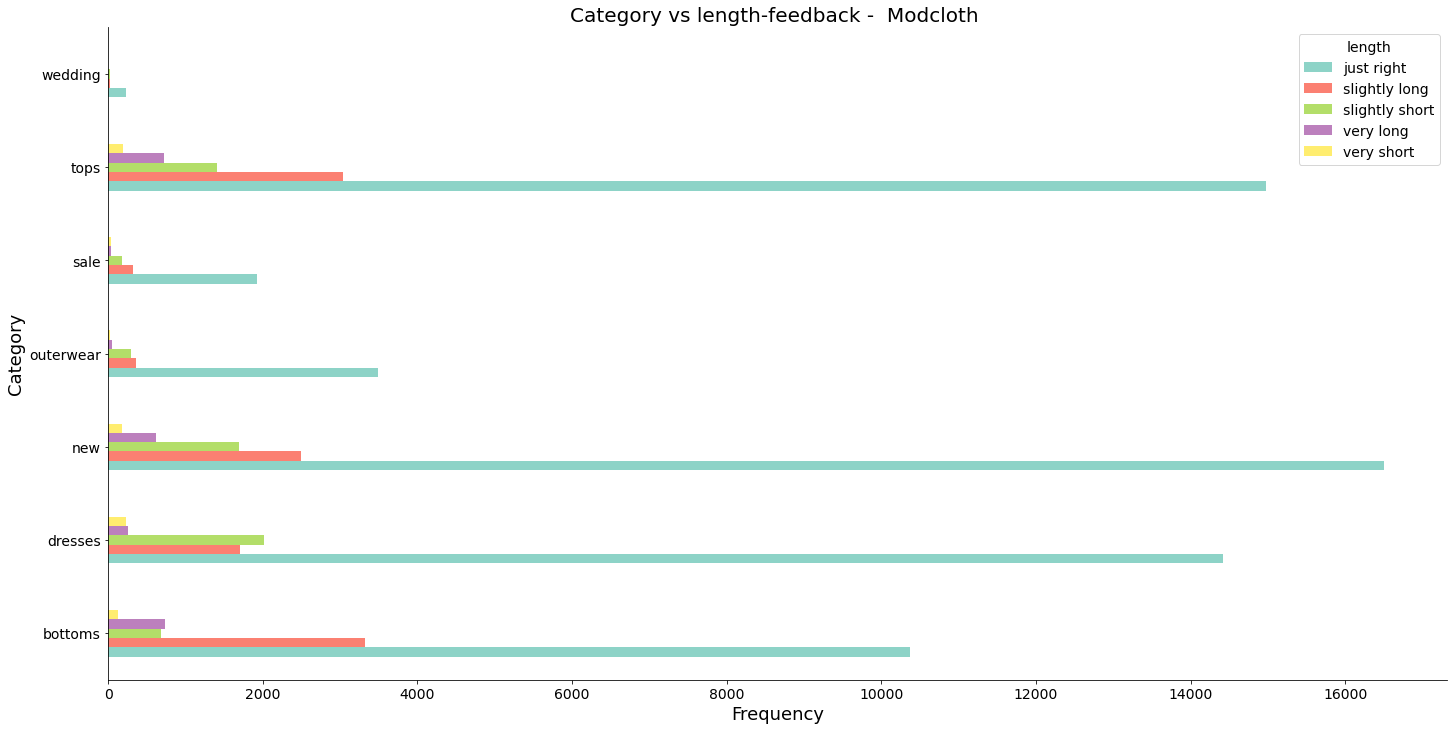

In [ ]:
cat_len = g_by_category['length'].value_counts()
cat_len = cat_len.unstack()
plot_barh(cat_len, 'length', 'Set3')


**Q** Which reason is the most common for returning clothes? 

In [ ]:
# I dont know if they returned it but reading the rating i would guess it is 'slightly long'

<a id="15"></a>
### Total Number of Users vs Total Number of items bought

**Q** What percantage of customers bought only one item at a single transaction? 


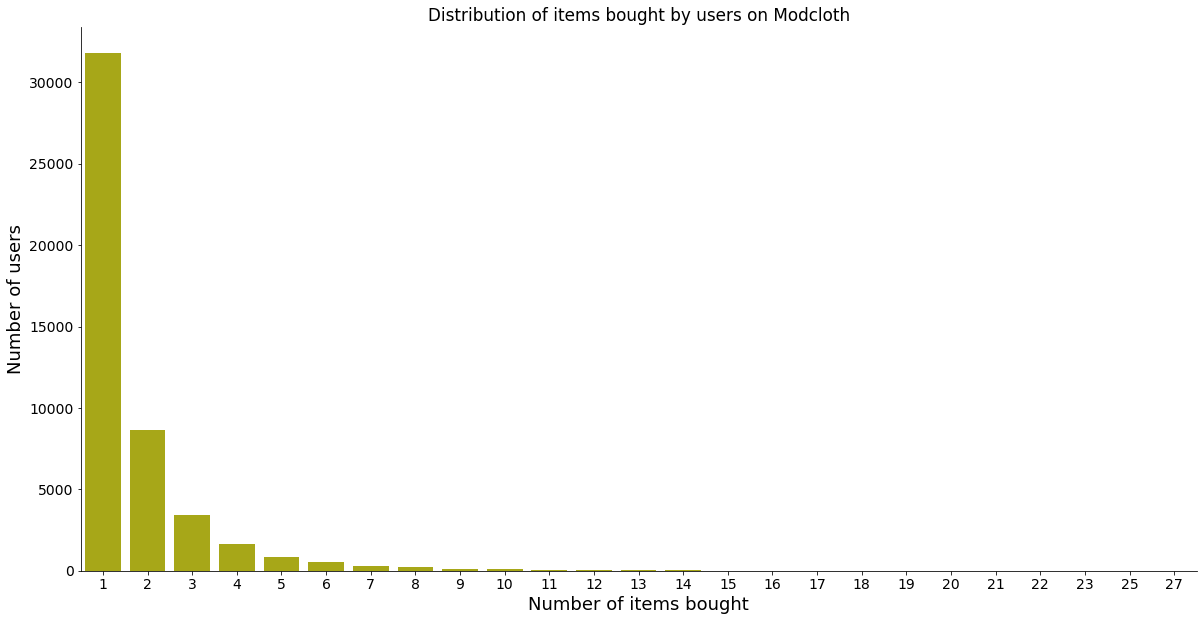

In [ ]:
# Users who bought so many items
items_bought = []
total_users = []
for i in range(min(mc_df.user_id.value_counts()), max(mc_df.user_id.value_counts())+1):
    all_users = sum(mc_df.user_id.value_counts() == i)
    if all_users != 0:
        total_users.append(all_users)
        items_bought.append(i)
plt.xlabel("Number of items bought", fontsize = 18)
plt.ylabel("Number of users", fontsize = 18)
plt.title("Distribution of items bought by users on Modcloth")
__ = sns.barplot(x=items_bought, y=total_users, color='y')
fig = plt.gcf()
fig.set_size_inches(20,10)

In [ ]:
# approx 33000 users bought one

<a id="16"></a>
## Height vs shoe_size -  Modcloth customers
It would be interesting to see if there exists a linear relation between the height of a person and their shoe-size, i.e.- it will mean shoe-size increases with increase in height!

* Investigate the correlation between shoe_size and height for the customers of Modcloth. 

* Create a visualisation that show the correlation between the two variables. 

<AxesSubplot:xlabel='shoe_size', ylabel='height'>

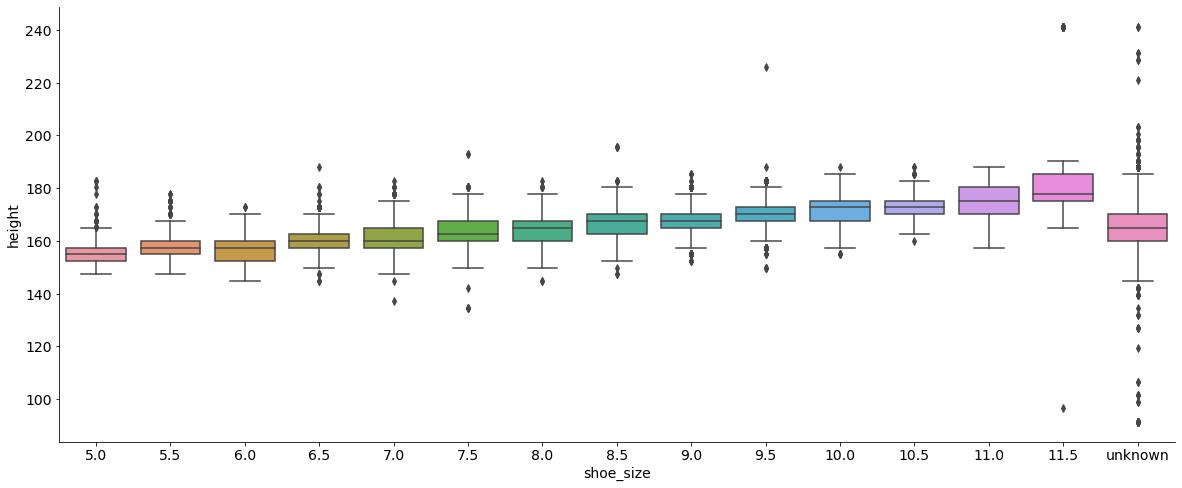

In [ ]:
sns.boxplot(y=mc_df['height'],x=mc_df['shoe_size'])

In [ ]:
# shosize increasing by height of the individuals

<AxesSubplot:xlabel='height', ylabel='shoe_size'>

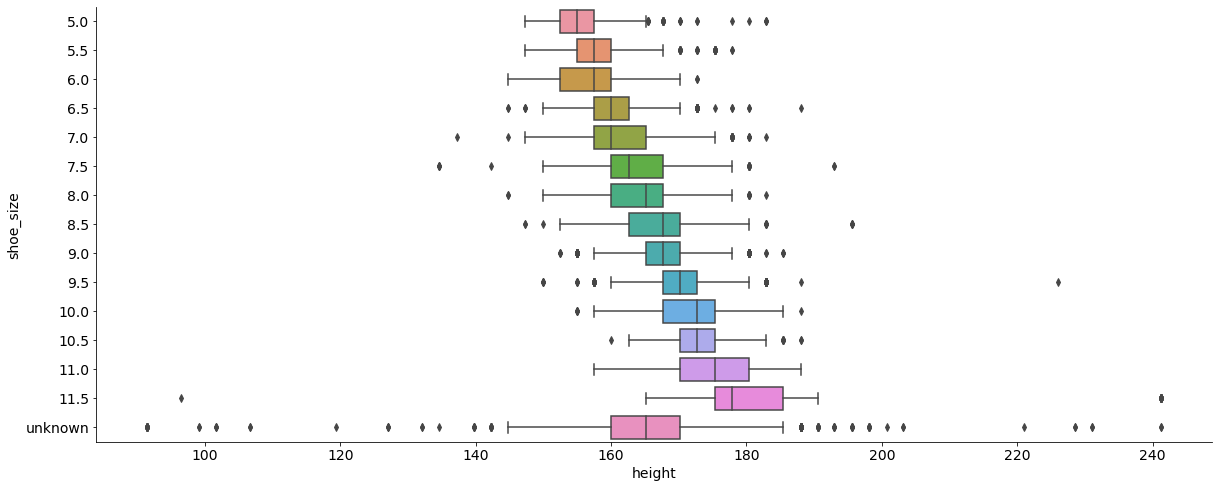

In [ ]:
sns.boxplot(y=mc_df['shoe_size'],x=mc_df['height'])

In [ ]:
# It might be easier to se this way. 
# But this way the human eye play tricks on you becouse factor that we read from left to right in a diagonal  
# pattern across the screen it lookas like it is decreasing rapidly which is totally wrong